# Getting started with Fermat
 
This notebook introduces the basic concepts in order to compute Fermat distance using the Fermat package.

We use a toy data set (the swiss roll) in order to illustrate. 

 **Contents**:
        
    o Data generation
    o Computing Fermat distance
    o Visualization using t-sne
    

In [1]:
import numpy as np
from scipy.spatial import  distance_matrix
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from generate_data import generate_swiss_roll

If you prefer to work without installing Fermat package, then you can import directly the files from the fermat folder

In [12]:
#import sys
#path_to_FermatFolder = '/home/facu/Dropbox/Repositorios/Fermat-distance' 
#sys.path.append(path_to_FermatFolder)

In [14]:
from fermat import Fermat

## Data generation

Generate the Swiss Roll data set.

In [16]:
data, labels = generate_swiss_roll(oscilations = 15, A = 3, n = 250)
print('Data dimension:{}'.format(data.shape))

Data dimension:(1000, 3)


Visualize the data

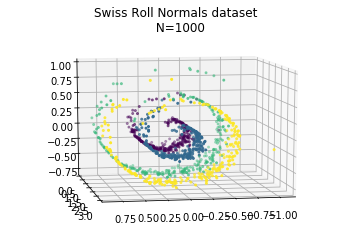

In [17]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.view_init(10, 80)
ax.scatter(xs=data[:,0], ys=data[:,1], zs=data[:,2], c=labels, s=4)
plt.title('Swiss Roll Normals dataset \n N=%s'%(data.shape[0]))

plt.show()

Compute euclidean distances between points in the data set

In [18]:
distances = distance_matrix(data,data)

## Computing Fermat-Distances

Parameters

In [19]:
alpha = 3

k = 100 
landmarks = 30

#### Exact method: computes all the pairwise Fermat distances in an exact way 


In [20]:
%%time

# Initialize the model
f_exact = Fermat(alpha = alpha, path_method='FW') 

# Fit
f_exact.fit(np.matrix(distances))

CPU times: user 2.47 s, sys: 4.02 ms, total: 2.48 s
Wall time: 2.16 s


In [21]:
fermat_dist_exact = f_exact.get_distances() 

#### Aprox method 1: using k-nearest neighbours

In [22]:
%%time

# Initialize Fermat model
f_aprox_D = Fermat(alpha, path_method='D', k=k) 

# Fit
f_aprox_D.fit(np.matrix(distances))

CPU times: user 2.55 s, sys: 0 ns, total: 2.55 s
Wall time: 2.35 s


In [23]:
fermat_dist_aprox_D = f_aprox_D.get_distances()

#### Aprox method 2: using landmarks and k-nearest neighbours 

In [24]:
%%time

# Initialize Fermat model
f_aprox_L = Fermat(alpha, path_method='L', k=k, landmarks=landmarks) 

# Fit
f_aprox_L.fit(np.matrix(distances))

CPU times: user 903 ms, sys: 12 ms, total: 915 ms
Wall time: 723 ms


In [25]:
fermat_dist_aprox_L = f_aprox_L.get_distances() 

## Visualization

Visualization for the Fermat distances using t-SNE

In [26]:
tsne_model = TSNE(n_components=2, verbose=0, perplexity=50, n_iter=500)
tsnes = tsne_model.fit_transform(fermat_dist_exact)

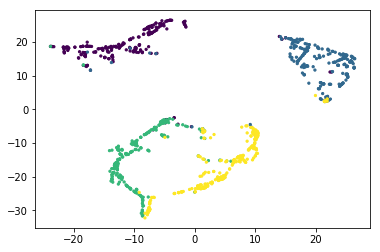

In [27]:
plt.scatter(tsnes[:,0],tsnes[:,1], c = labels, s = 5)